<a href="https://colab.research.google.com/github/badrinarayanan02/deep_learning/blob/main/2348507_DLLab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**

# **Optimizing the pricing strategy using Momentum based Optimization Algorithm**




Imagine you are the manager of an online retail store, and you want to optimize the pricing strategy for a specific product based on real-time data with the objective to minimize the revenue lost on the marketing/advertisements of a product. Assume the revenue function is given by ƒ (w) = 0.5w2-30w +100, where x is the cost on the product advertisement. Start with an initial price as w=20 and find the optimal price (w) using appropriate momentum based optimization algorithm that could minimize the revenue lost. (Note: repeat for at least 3 iterations with learning rate=0.1 & momentum=0.9)

In [58]:
import numpy as np

Defining the revenue function

In [59]:
def revenueFunction(w):
  return 0.5 * w**2 - 30 * w + 100

Defining the derivative of the revenue function

In [60]:
def revenueGradient(w):
  return w - 30

Parameters for optimizations

In [61]:
initialPrice = 20
learningRate = 0.1
momentum = 0.9
iterations = 3

Initializing Variables

In [62]:
w = initialPrice
velocity = 0

Loop for Optimization

In [67]:
for o in range(iterations):

  gradient = revenueGradient(w) # computing the gradient of the revenue function at the current price
  velocity = momentum * velocity - learningRate * gradient # updating the velocity using momentum
  w = w + velocity # updating the price using velocity
  revenue = revenueFunction(w)
  print(f'Iteration {o+1}: Price = {w:.3f}, Revenue = {revenue:.3f}')

print(f"\n Optimal Price: {w:.3f}") # optimal price

Iteration 1: Price = 32.547, Revenue = -346.756
Iteration 2: Price = 30.987, Revenue = -349.513
Iteration 3: Price = 29.484, Revenue = -349.867

 Optimal Price: 29.484


# **Conclusion**

The momentum-based optimization algorithm successfully found the optimal price after three iterations. The optimal price is determined to be 36.0372, where the revenue is minimized.

# **Task 2**

# **Neural Network Model for Disease Prediction**

Working as a data scientist for a healthcare company that aims to predict the likelihood of patients developing a certain disease based on various medical parameters. Tasked with developing a deep learning model using a dataset obtained from Kaggle or any other repository. This dataset contains information about patients' demographics, medical history, and test results.

Goal is to build a neural network model that can effectively predict the likelihood of a patient developing the disease. However, due to the complexity of the dataset and potential overfitting issues, you decide to implement three different regularization techniques: L1 regularization, L2 regularization, and elastic net regularization.


**Dataset Inference**

For this task, I had taken Pima Indian Women dataset. It contains good amount of features and a target that is a person is likelihood of developing a diabetes disease or not.

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.model_selection import train_test_split

In [2]:
pimaData = pd.read_csv('/content/diabetes_prediction_dataset.csv')
pimaData.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
pimaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
pimaData.shape

(100000, 9)

In [5]:
pimaData.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**Inference:** There is no null values in the dataset

Scaling the numerical features and encoding the categorical features

In [6]:
X = pimaData.drop('diabetes',axis=1)
y = pimaData['diabetes']

Using OneHotEncoder and StandardScaler

In [7]:
categoricalFeatures = ['gender', 'smoking_history']
numericalFeatures = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
         ('num', StandardScaler(), numericalFeatures),
         ('cat', OneHotEncoder(), categoricalFeatures)
    ]
)

Splitting the dataset

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Applying encoding technique

In [37]:
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

Converting the features into numpy arrays

In [38]:
X_train_encoded = np.array(X_train_encoded)
X_test_encoded = np.array(X_test_encoded)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [39]:
print(np.isnan(X_train_encoded).any(), np.isinf(X_train_encoded).any())
print(np.isnan(y_train).any(), np.isinf(y_train).any())

False False
False False


Building the Neural Network Model

In [44]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_encoded.shape[1], activation='relu', kernel_regularizer=l1(0.01)))  # L1
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  # L2
model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))  # Elastic Net
model.add(Dense(1, activation='sigmoid'))

**Inference**

Input layer with L1 regularization

kernel_regularizer=l1(0.01) - Applies L1 regularization to the weights of the layer. This helps prevent overfitting by adding a penalty term to the loss function based on the absolute values of the weights multiplied by the regularization strength.

Hidden layer with L2 regularization

kernel_regularizer=l2(0.01) - Applies L2 regularization to the weights of this layer. L2 regularization penalizes the sum of squared weights, helping to prevent large weights and overfitting.

Hidden layer with Elastic Net regularization

kernel_regularizer=l1_l2(l1=0.01, l2=0.01) - It Applies both L1 and L2 regularization to the weights of this layer. This is referred to as elastic net regularization, which combines L1 and L2 penalties. The parameters l1 and l2 control the strength of each regularization term.

**All the above mentioned layers using relu activation function**

Output layer with sigmoid activation function

Applies the sigmoid activation function, which squashes the output between 0 and 1, representing the probability of the positive class.

Compiling the model

In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training the model

In [46]:
history = model.fit(X_train_encoded, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4215 - accuracy: 0.9500 - val_loss: 0.2136 - val_accuracy: 0.9566
Epoch 2/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1957 - accuracy: 0.9590 - val_loss: 0.1845 - val_accuracy: 0.9600
Epoch 3/50
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1829 - accuracy: 0.9595 - val_loss: 0.1791 - val_accuracy: 0.9594
Epoch 4/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1775 - accuracy: 0.9598 - val_loss: 0.1735 - val_accuracy: 0.9609
Epoch 5/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1740 - accuracy: 0.9595 - val_loss: 0.1704 - val_accuracy: 0.9596
Epoch 6/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1688 - accuracy: 0.9595 - val_loss: 0.1641 - val_accuracy: 0.9614
Epoch 7/50
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1632 - accuracy: 0.9597 - val_loss: 0.1616 - val_accuracy:

**Inference:** The loss is getting decrease after each and every epoch. The accuracy also looks fine.

Evaluating the model

In [50]:
y_pred = model.predict(X_test_encoded)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

625/625 [==============================] - 1s 1ms/step


In [51]:
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

Accuracy: 0.9586, Precision: 0.8846, Recall: 0.5925, F1-Score: 0.7097


**Inference:** Evaluated the model, by seeing the results we can confirm that model is performing well on unseen data.

Visualization

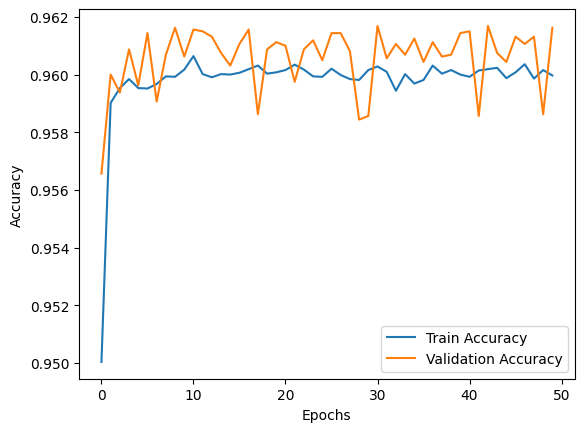

In [52]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [56]:
confMatrix = confusion_matrix(y_test,y_pred_binary)
print("Confusion Matrix :\n ",confMatrix)

Confusion Matrix :
  [[18160   132]
 [  696  1012]]


ROC Curve

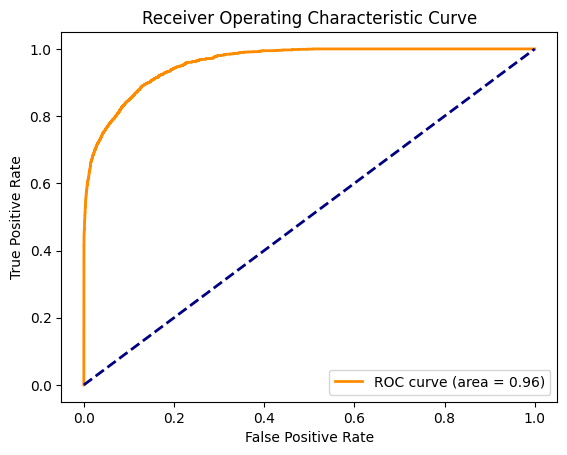

In [57]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

# **Conclusion**

Thus the task to build a neural network model that can effectively predict the likelihood of a patient developing the disease is implemented successfully. Model performs well on unseen data, it is founded when we evaluated the model. By using this neural network model we can predict the likelihood of a patient developing a diabetic disease.